In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pickle
import os
import datetime
from tensorflow import keras as keras
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

2023-10-11 02:29:03.198683: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# physical_devices = tf.config.list_physical_devices('GPU')
# try:
#   tf.config.experimental.set_memory_growth(physical_devices[0], True)
# except:
#   # Invalid device or cannot modify virtual devices once initialized.
#   pass

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=9216)]
    )
  except RuntimeError as e:
    print(e)

devices = tf.config.list_physical_devices()
print("Available devices:\n", devices)

tf.config.set_visible_devices(gpus[0], "GPU")

logical_gpus = tf.config.experimental.list_logical_devices("GPU")
print("Using GPU:", logical_gpus[0].name)

Available devices:
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Using GPU: /device:GPU:0


In [3]:
data = pd.read_csv('./data/large/train_data_histogram_longtime_210000.csv')

y = data['output_val']
X = data.drop(['output_val'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [4]:
# data = pd.read_csv('./data/train_data_histogram_longtime_210000.csv')
# print the labels of the columns
print(data.columns)


Index(['U', 'R', 'output_val'], dtype='object')


In [5]:
print("X_test:",X_test.shape)
print("X_train:",X_train.shape)

X_test: (41980001, 2)
X_train: (167920000, 2)


In [8]:
# X_train = X_train.to_numpy().reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test = X_test.to_numpy().reshape((X_test.shape[0], 1, X_test.shape[1]))
# y_train = y_train.to_numpy().reshape((y_train.shape[0], 1, 1))
# y_test = y_test.to_numpy().reshape((y_test.shape[0], 1, 1))

# input_dim = 5
# hidden_size = 5
# output_size = 1

# model = keras.Sequential([
#     keras.layers.LSTM(hidden_size, return_sequences=True, input_shape=(None, input_dim), activation='tanh', recurrent_activation='sigmoid'),
#     keras.layers.Dropout(0.2),
#     keras.layers.LSTM(hidden_size, activation='tanh', recurrent_activation='sigmoid'),
#     keras.layers.Dense(output_size, activation='linear')
# ])

# y_test_2d = y_test.reshape(y_test.shape[0], -1)
# x_test_2d = X_test.reshape(X_test.shape[0], -1)

In [8]:
# # Load previously trained model
# model = tf.keras.models.load_model('saved_models/histogram_longtime_210000_coursegrained_aug1_10000epochs')

In [7]:
model = keras.Sequential([
    keras.layers.Dense(60, activation='tanh', input_shape=(2,), kernel_initializer='glorot_normal'),
    keras.layers.Dropout(0.1),
    keras.layers.Normalization(),
    keras.layers.Dense(30, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Dropout(0.1),
    keras.layers.Normalization(),
    keras.layers.Dense(20, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Normalization(),
    keras.layers.Dense(10, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Normalization(),
    keras.layers.Dense(1)
])

In [48]:
model = keras.Sequential([
    keras.layers.Normalization(),
    keras.layers.Dense(120, activation='relu', input_shape=(2,)),
    keras.layers.Dropout(0.1),
    keras.layers.Normalization(),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Normalization(),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Normalization(),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Normalization(),
    keras.layers.Dense(1, activation='relu')
])

In [9]:
# Create the optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

# Compile the model
# model.compile(optimizer=optimizer, loss='mse', jit_compile=True)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
epochs = 1500  # Number of training iterations
batch_size = 50000  # Number of samples per gradient update
# batch_size = 64

# Create a learning rate scheduler

lr_scheduler = ReduceLROnPlateau(factor=0.3, patience=300, min_lr=0.001)

# Create an early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1500, mode="min", restore_best_weights=True)

# Create a csv logger
csv_logger = tf.keras.callbacks.CSVLogger('training.log')

# Add the scheduler to the callbacks list
callbacks = [lr_scheduler, early_stopping_callback]

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.2)

Epoch 1/1500
27/27 [==============================] - 1s 6ms/step - loss: 0.2679 - val_loss: 0.2194 - lr: 1.0000e-04
Epoch 2/1500
27/27 [==============================] - 0s 3ms/step - loss: 0.2654 - val_loss: 0.2180 - lr: 1.0000e-04
Epoch 3/1500
27/27 [==============================] - 0s 3ms/step - loss: 0.2647 - val_loss: 0.2187 - lr: 1.0000e-04
Epoch 4/1500
27/27 [==============================] - 0s 3ms/step - loss: 0.2646 - val_loss: 0.2180 - lr: 1.0000e-04
Epoch 5/1500
27/27 [==============================] - 0s 3ms/step - loss: 0.2648 - val_loss: 0.2181 - lr: 1.0000e-04
Epoch 6/1500
27/27 [==============================] - 0s 3ms/step - loss: 0.2653 - val_loss: 0.2182 - lr: 1.0000e-04
Epoch 7/1500
27/27 [==============================] - 0s 3ms/step - loss: 0.2647 - val_loss: 0.2180 - lr: 1.0000e-04
Epoch 8/1500
27/27 [==============================] - 0s 3ms/step - loss: 0.2654 - val_loss: 0.2191 - lr: 1.0000e-04
Epoch 9/1500
27/27 [==============================] - 0s 3ms/ste

KeyboardInterrupt: 

In [51]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Make predictions using the trained model
predictions = model.predict(X_test)

13119/13119 [==============================] - 10s 775us/step - loss: 0.0379
Test loss: 0.0379268079996109
13119/13119 [==============================] - 8s 617us/step


In [52]:
# Save the model
# model.save("saved_models/histogram_longtime_210000_coursegrained_aug3_relu_bestmodel_loss0012_120neurons")

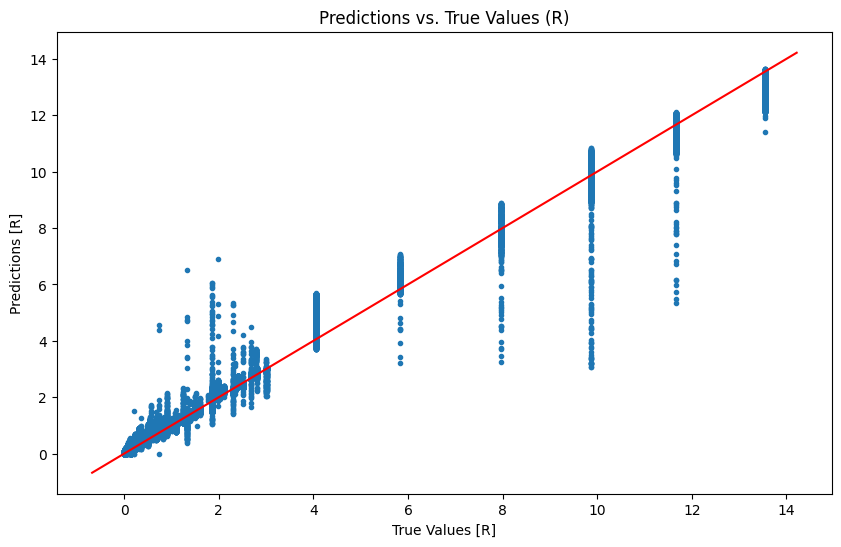

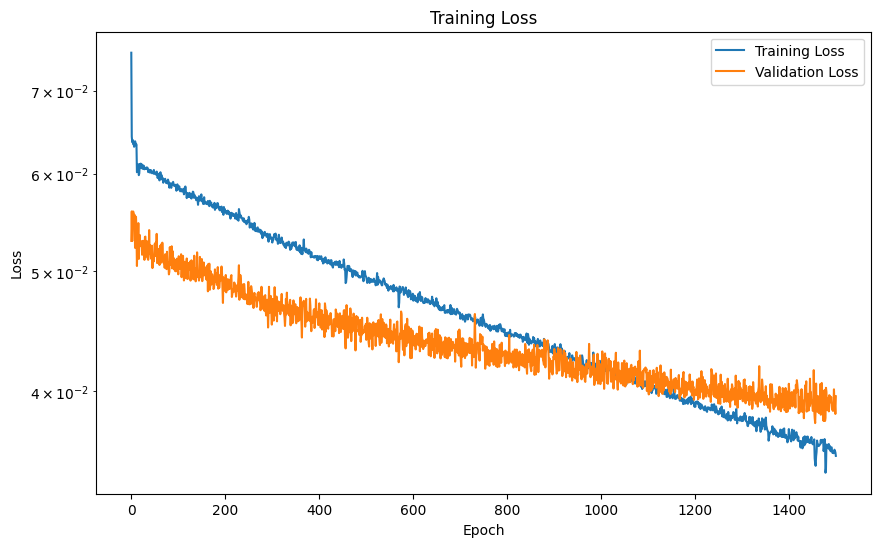

In [53]:
# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(pd.DataFrame(y_test).iloc[:,0], predictions, '.')
# plt.plot(y_test_2d, predictions, '.')
plt.xlabel('True Values [R]')
plt.ylabel('Predictions [R]')
plt.title('Predictions vs. True Values (R)')
# Make a 45 degree line in the same scale and range
x = np.linspace(*plt.gca().get_xlim())
plt.plot(x, x,'-', color='red')

# Plot the loss vs. epochs
plt.figure(figsize=(10, 6))
plt.semilogy(history.history['loss'], label='Training Loss')
plt.semilogy(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

In [54]:
# extract U and R from the test data
U_test = X_test.iloc[:,0]
R_test = X_test.iloc[:,1]
output_test = y_test.iloc[:]

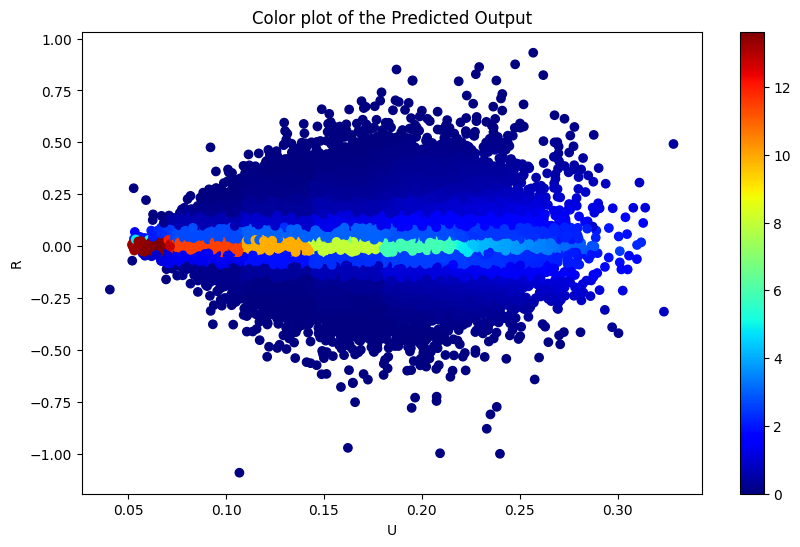

In [55]:
# Make a color plot of the predictions with U_test and R_test as the axes
plt.figure(figsize=(10, 6))
# plt.scatter(U_test, R_test, c=np.log(predictions.reshape(-1)), cmap='jet')
plt.scatter(U_test, R_test, c=predictions.reshape(-1), cmap='jet')
plt.xlabel('U')
plt.ylabel('R')
plt.title('Color plot of the Predicted Output')
plt.colorbar()
plt.show()


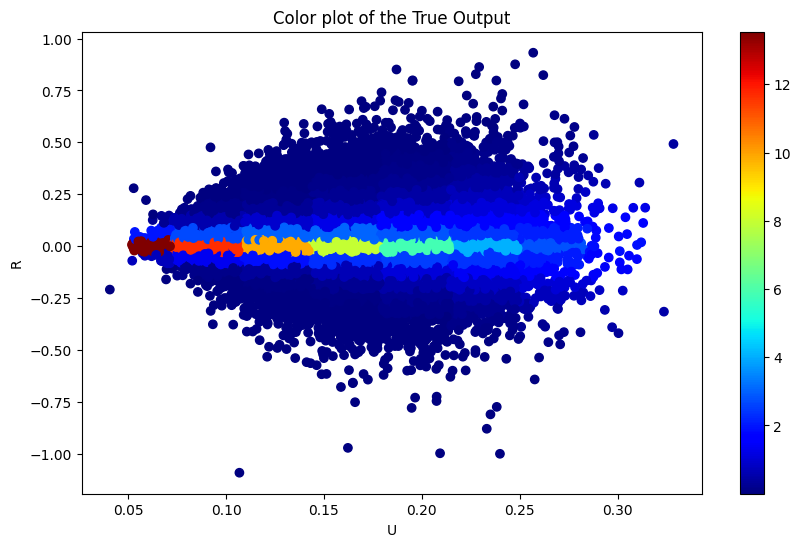

In [20]:
# Make a color plot of the output_test with U_test and R_test as the axes
plt.figure(figsize=(10, 6))
# plt.scatter(U_test, R_test, c=np.log(output_test), cmap='jet')
plt.scatter(U_test, R_test, c=output_test, cmap='jet')
plt.xlabel('U')
plt.ylabel('R')
plt.title('Color plot of the True Output')
plt.colorbar()
plt.show()

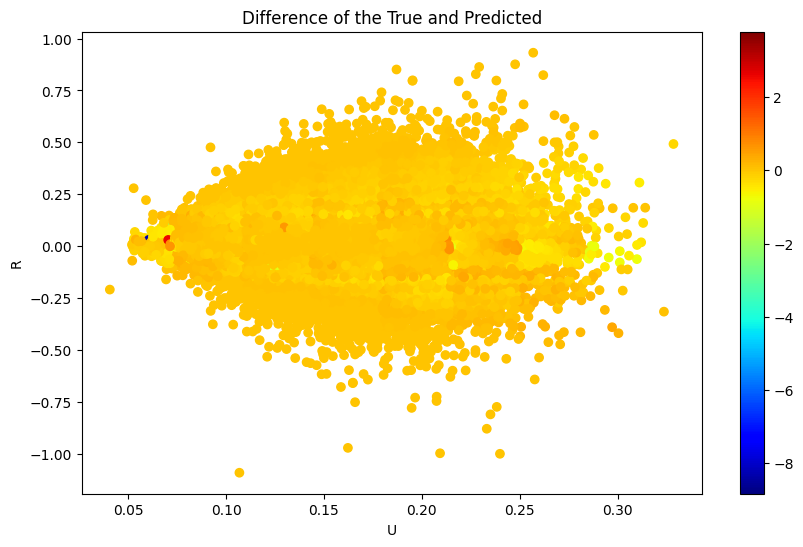

In [89]:
# Make a color plot of the output_test with U_test and R_test as the axes
plt.figure(figsize=(10, 6))
plt.scatter(U_test, R_test, c=output_test-predictions.reshape(-1), cmap='jet')
plt.xlabel('U')
plt.ylabel('R')
plt.title('Difference of the True and Predicted')
plt.colorbar()
plt.show()

In [90]:
U_grid = np.linspace(U_test.min(), U_test.max(), 100)
R_grid = np.linspace(R_test.min(), R_test.max(), 100)

U_grid_mesh, R_grid_mesh = np.meshgrid(U_grid, R_grid)

# Make a data frame of the U_grid_mesh and R_grid_mesh
y_mesh = pd.DataFrame(U_grid_mesh.reshape(-1), columns=['U'])
y_mesh['R'] = R_grid_mesh.reshape(-1)

In [91]:
mesh_predictions = model.predict(y_mesh)

313/313 [==============================] - 0s 609us/step


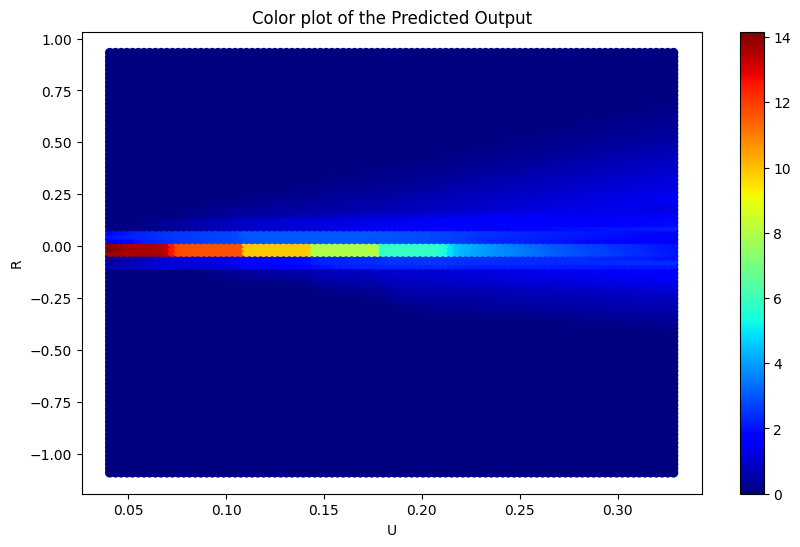

In [92]:
# Make a color plot of the predictions with U_test and R_test as the axes
plt.figure(figsize=(10, 6))
plt.scatter(U_grid_mesh.reshape(-1), R_grid_mesh.reshape(-1), c=mesh_predictions.reshape(-1), cmap='jet')
plt.xlabel('U')
plt.ylabel('R')
plt.title('Color plot of the Predicted Output')
plt.colorbar()
plt.show()


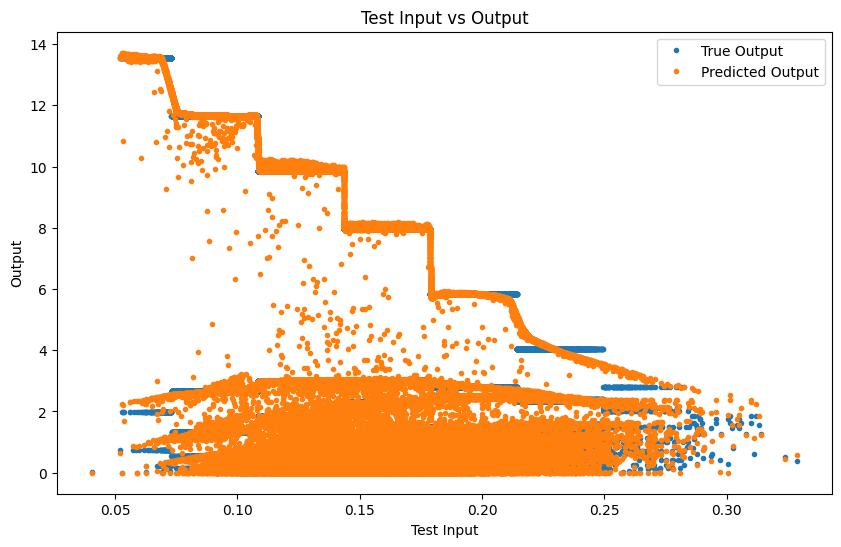

In [93]:
plt.figure(figsize=(10, 6))
#Plot the true output and the predicted output
plt.plot(pd.DataFrame(X_test).iloc[:,0], pd.DataFrame(y_test).iloc[:,0],'.', label='True Output')
plt.plot(pd.DataFrame(X_test).iloc[:,0], predictions,'.', label='Predicted Output')
# plt.plot(x_test_2d[:,0], y_test_2d,'.', label='True Output')
# plt.plot(x_test_2d[:,0], predictions,'.', label='Predicted Output')

plt.xlabel('Test Input')
plt.ylabel('Output')
plt.title('Test Input vs Output')
plt.legend()
plt.show()


In [267]:
import seaborn as sns

# Plot the scatter plot with a regression line
sns.regplot(x=pd.DataFrame(X_test).iloc[:,0], y=predictions, scatter_kws={"color": "blue", 's': 10}, line_kws={"color": "red"}, order=1)

plt.show()

ModuleNotFoundError: No module named 'seaborn'

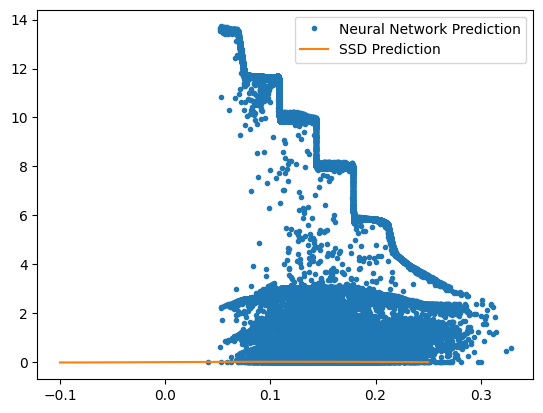

In [94]:
with open("./variables.pickle", "rb") as f:
    R_space, U_space = pickle.load(f)
    
# plt.plot(test_input[sorted_indices], predictions[sorted_indices], label='Neural Network Prediction')
plt.plot(pd.DataFrame(X_test).iloc[:,0], predictions,'.', label='Neural Network Prediction')
plt.plot(U_space, R_space, label='SSD Prediction')
#plt.ylim(0, 0.02)
plt.legend()
plt.show()